In [1]:
# In this EDA project, I investigate the Titanic Dataset using Scipy, NumPy, Pandas, Matplotlib and Seaborn.
# Visualizations are used to illustrate and explore the relations between 'Survived' and other variables.
# Also try to predict the survivals with the help of Decision Tree.
# To get a more precise result, chi-squared test is conducted to determine the features to use in the model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from decimal import Decimal
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(f'Train dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.')
print(f'Test dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns.')

Train dataset has 891 rows and 12 columns.
Test dataset has 418 rows and 13 columns.


In [4]:
# Column numbers are different
# Look at the columns in each dataset
print(f'Columns in Train: {train_df.columns}.')
print(f'Columns in Test: {test_df.columns}.')

Columns in Train: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object').
Columns in Test: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Unnamed: 12'],
      dtype='object').


In [5]:
# Infer that "Unnamed" column in Test will contain the survival prediction result
# So there is no problem with the Test data
# Begin to clean the Train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 'Ticket' field contains ticket number thus is not helpful for the analysis.
train_df = train_df.drop(['Ticket'], axis=1)
# Check data types
train_df.dtypes
# All good

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Check missing values
train_df.isnull().sum()
# There are missing values in columns "Age", "Cabin" and "Embarked".

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Deal with missing values
# Age: Replace missing values with mean age
train_df['Age'].fillna(int(train_df['Age'].mean()), inplace=True)
# Cabin: Drop this variable because the majority of its values are missing
train_df = train_df.drop(['Cabin'], axis=1)
# Embarked: Replace missing values with mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [9]:
# Now there is no missing value
# Start EDA

In [10]:
# Overall organization of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

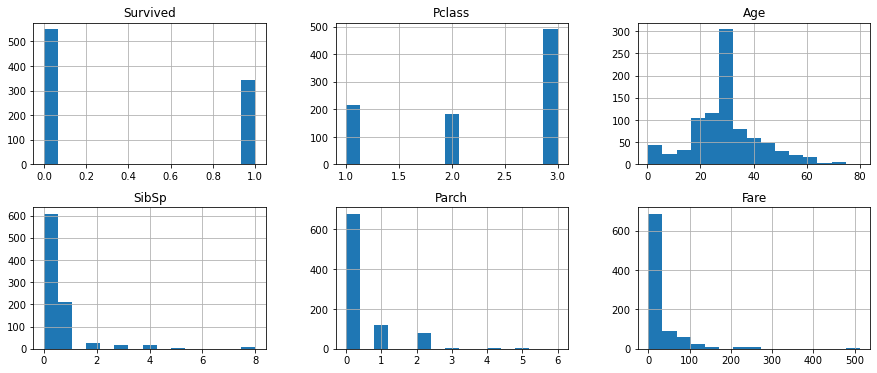

In [11]:
# Univariable inspection
numerical = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
train_df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 3))

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


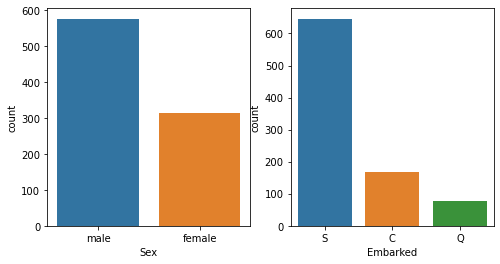

In [12]:
# Univariable inspection
categorical = ['Sex', 'Embarked']
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(train_df[variable], ax=subplot)

Text(0.5, 1.0, 'Survived(%) vs Sex')

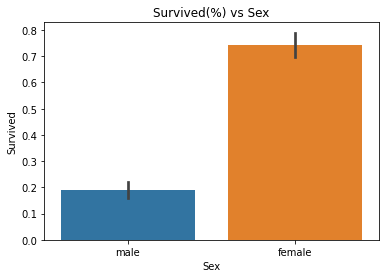

In [13]:
# "Children and women first" happened during the evacuation.
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survived(%) vs Sex')
# We can see the survival rate of women was far more than that of men.

In [14]:
# The survival rate of children was the largest.
age_group = []
for i in train_df['Age']:
    if i <= 12:
        age_group.append('Children')
    elif i <= 30:
        age_group.append('Youth')
    elif i <= 50:
        age_group.append('Middle-aged')
    else:
        age_group.append('Senior')
train_df['Age_group'] = age_group

Text(0.5, 1.0, 'Survived(%) vs Age Groups')

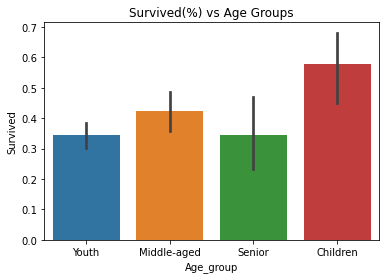

In [15]:
sns.barplot(x='Age_group', y='Survived', data=train_df)
plt.title('Survived(%) vs Age Groups')

Text(0.5, 1.0, 'Survived(%) vs Pclass')

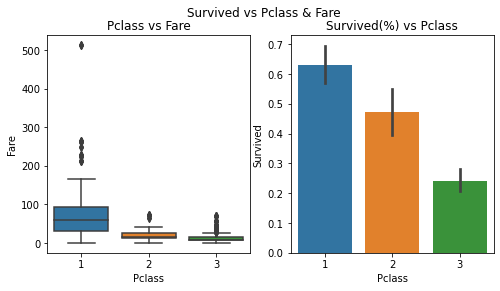

In [16]:
# The more people paid for the tickets, the more likely they would survive.
# People in the 1st and 2nd ticket class were more likely to survive.
plt.figure(figsize=(8, 4))
plt.suptitle('Survived vs Pclass & Fare')
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Pclass vs Fare')
plt.subplot(1, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survived(%) vs Pclass')

In [17]:
# People who paid for the highest price got rescued. Even though two of them were male.
train_df[train_df['Fare'] == train_df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C,Middle-aged
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C,Middle-aged
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C,Middle-aged


In [18]:
# Family size of 2-4 had more chances to survive.
# The chances of survival dropped drastically if someone traveled alone or with more family members.
def family_size(df):
    count = []
    for i in range(len(df)):
        count.append(df['SibSp'][i] + df['Parch'][i] + 1)
        i = i + 1
    df['Family_size'] = count
    return df

In [19]:
train_df = family_size(train_df)
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Youth,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Middle-aged,2


Text(0.5, 1.0, 'Survived(%) vs Family Size')

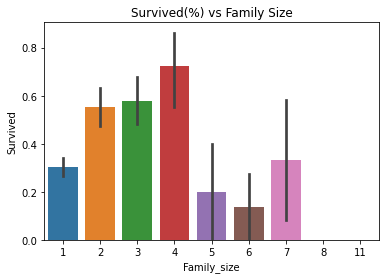

In [20]:
sns.barplot(x='Family_size', y='Survived', data=train_df)
plt.title('Survived(%) vs Family Size')

In [21]:
# The reason for the highest surviving rate of embarking from Cherbourg is because there are more 1st class passengers.
train_df[['Survived', 'Fare', 'Pclass', 'Embarked']].groupby('Embarked').mean()

,Survived,Fare,Pclass
Embarked,,,
C,0.553571,59.954144,1.886905
Q,0.389610,13.276030,2.909091
S,0.339009,27.243651,2.346749


In [22]:
print('The average survival rate is {}.'.format(train_df['Survived'].mean()))

The average survival rate is 0.3838383838383838.


Text(0.5, 1.0, 'Embarked vs Pclass')

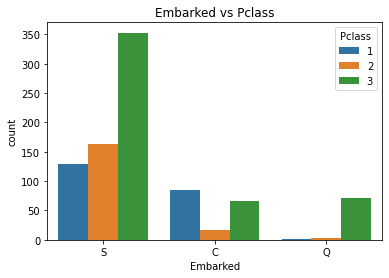

In [23]:
sns.countplot(x='Embarked', hue='Pclass', data=train_df)
plt.title('Embarked vs Pclass')

In [24]:
# Chi-squared test
# Are all factors important to survival prediction?
alpha = 0.05

In [25]:
colx = 'Pclass'
coly = 'Survived'
x = train_df[colx].astype(str)
y = train_df[coly].astype(str)
df_observed_pcl = pd.crosstab(y, x)
chi2, p, dof, expected = stats.chi2_contingency(df_observed_pcl.values)
if p < alpha:
    result="{0} is IMPORTANT for Prediction".format(colx)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colx)
print(result)

Pclass is IMPORTANT for Prediction


In [26]:
colx = 'Sex'
coly = 'Survived'
x = train_df[colx].astype(str)
y = train_df[coly].astype(str)
df_observed_sex = pd.crosstab(y, x)
chi2, p, dof, expected = stats.chi2_contingency(df_observed_sex.values)
df_expected_sex = pd.DataFrame(expected, columns=df_observed_sex.columns, index=df_observed_sex.index)
alpha=0.05
if p < alpha:
    result="{0} is IMPORTANT for Prediction".format(colx)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colx)
print(result)

Sex is IMPORTANT for Prediction


In [27]:
colx = 'SibSp'
coly = 'Survived'
x = train_df[colx].astype(str)
y = train_df[coly].astype(str)
df_observed_sib = pd.crosstab(y, x)
chi2, p, dof, expected = stats.chi2_contingency(df_observed_sib.values)
if p < alpha:
    result="{0} is IMPORTANT for Prediction".format(colx)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colx)
print(result)

SibSp is IMPORTANT for Prediction


In [28]:
colx = 'Parch'
coly = 'Survived'
x = train_df[colx].astype(str)
y = train_df[coly].astype(str)
df_observed_par = pd.crosstab(y, x)
chi2, p, dof, expected = stats.chi2_contingency(df_observed_par.values)
if p < alpha:
    result="{0} is IMPORTANT for Prediction".format(colx)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colx)
print(result)

Parch is IMPORTANT for Prediction


In [29]:
colx = 'Fare'
coly = 'Survived'
x = train_df[colx].astype(str)
y = train_df[coly].astype(str)
df_observed_fare = pd.crosstab(y, x)
chi2, p, dof, expected = stats.chi2_contingency(df_observed_fare.values)
if p < alpha:
    result="{0} is IMPORTANT for Prediction".format(colx)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colx)
print(result)

Fare is IMPORTANT for Prediction


In [30]:
colx = 'Embarked'
coly = 'Survived'
x = train_df[colx].astype(str)
y = train_df[coly].astype(str)
df_observed_emb = pd.crosstab(y, x)
chi2, p, dof, expected = stats.chi2_contingency(df_observed_emb.values)
if p < alpha:
    result="{0} is IMPORTANT for Prediction".format(colx)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colx)
print(result)

Embarked is IMPORTANT for Prediction


In [31]:
colx = 'Age'
coly = 'Survived'
x = train_df[colx].astype(str)
y = train_df[coly].astype(str)
df_observed_age = pd.crosstab(y, x)
chi2, p, dof, expected = stats.chi2_contingency(df_observed_age.values)
if p < alpha:
    result="{0} is IMPORTANT for Prediction".format(colx)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colx)
print(result)

Age is IMPORTANT for Prediction


In [32]:
colx = 'Name'
coly = 'Survived'
x = train_df[colx].astype(str)
y = train_df[coly].astype(str)
df_observed_name = pd.crosstab(y, x)
chi2, p, dof, expected = stats.chi2_contingency(df_observed_name.values)
if p < alpha:
    result="{0} is IMPORTANT for Prediction".format(colx)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colx)
print(result)

Name is NOT an important predictor. (Discard Name from model)


In [33]:
colx = 'PassengerId'
coly = 'Survived'
x = train_df[colx].astype(str)
y = train_df[coly].astype(str)
df_observed_pas = pd.crosstab(y, x)
chi2, p, dof, expected = stats.chi2_contingency(df_observed_pas.values)
if p < alpha:
    result="{0} is IMPORTANT for Prediction".format(colx)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colx)
print(result)

PassengerId is NOT an important predictor. (Discard PassengerId from model)


In [34]:
# 'Age', 'Embarked', 'Fare', 'Parch', 'SibSp', 'Sex' and 'Pclass' are important factors.

In [35]:
# Use Decision Tree to predict survivals
train_df_pre = train_df
train_df_pre['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
train_df_pre['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
factors = ['Age', 'Embarked', 'Fare', 'Parch', 'SibSp', 'Sex', 'Pclass']
target = ['Survived']
model = DecisionTreeClassifier(random_state=0)
x = train_df_pre[factors]
y = train_df_pre[target]
model.fit(x, y)

DecisionTreeClassifier(random_state=0)

In [36]:
test_df = test_df.drop(['Ticket'], axis=1)
test_df.dtypes
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
Survived         0
Unnamed: 12    418
dtype: int64

In [37]:
test_df['Age'].fillna(int(test_df['Age'].mean()), inplace=True)
test_df = test_df.drop(['Cabin'], axis=1)
test_df = test_df[test_df['Fare'].notna()]

In [38]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Unnamed: 12
0,1284,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,20.2500,S,0,NaN
1,1237,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,7.6500,S,1,NaN
2,949,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,7.6500,S,1,NaN
3,1143,3,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,7.9250,S,1,NaN
4,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C,1,NaN


In [39]:
test_df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
test_df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
X = test_df[factors]

In [40]:
X = test_df[factors]
predictions = model.predict(X)

In [41]:
test_df['Unnamed: 12'] = predictions.astype(int)
test_df.rename(columns = {'Unnamed: 12':'Survived_pre'}, inplace = True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Survived_pre
0,1284,3,"Abbott, Master. Eugene Joseph",0,13.0,0,2,20.2500,0,0,1
1,1237,3,"Abelseth, Miss. Karen Marie",1,16.0,0,0,7.6500,0,1,1
2,949,3,"Abelseth, Mr. Olaus Jorgensen",0,25.0,0,0,7.6500,0,1,0
3,1143,3,"Abrahamsson, Mr. Abraham August Johannes",0,20.0,0,0,7.9250,0,1,0
4,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,7.2292,1,1,1


In [42]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    accuracy = correct_predictions/len(y_true)
    return accuracy
titanic_accuracy = calculate_accuracy(test_df['Survived'], test_df['Survived_pre'])
titanic_accuracy

0.7434052757793765